In [1]:
import sys
sys.path.append('../modules')
import lasso_analysis
from lasso_analysis import PlastPredictor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import zscore
import pickle

In [2]:
pl_full = pd.read_pickle('../database/plasticizer_data_v10_polarity.pkl')
pl_pol = pd.concat([pl_full[pl_full.columns[1:195]], pl_full['Polarity']], axis=1)
all_cols = pl_pol.columns.to_numpy()
pl_data = pl_pol[all_cols].to_numpy()
lin_data = pd.read_pickle('../database/linolein_test.pkl')
lin_data['Polarity'] = 0.048856
lin_data = lin_data[all_cols].to_numpy()
org_full = pd.read_pickle('../database/org_polarity_v2.pkl')

In [3]:
psim1 = open("pubs_similarity.txt", 'r')
psim11 = [line.rstrip('\n') for line in psim1]
psim2 = open("pubs_othersim.txt", 'r')
psim22 = [line.rstrip('\n') for line in psim2]

In [4]:
org_full
org_full['Dsim'] = psim11
org_full['Nasim'] = psim22

In [5]:
org_full = org_full.sort_values(by ='Dsim')

In [6]:
org_full = org_full[:5000]
org_data = org_full[all_cols].to_numpy()

In [7]:
pp = PlastPredictor(reg_param=1)
pp_model = pp.fit_model(pl_data, org_data)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4888905167989037, tolerance: 0.15721487839771112
  positive)
//anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4304338887330914, tolerance: 0.15723760928310296
  positive)
//anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8582485244335203, tolerance: 0.15718912732474966
  positive)
//anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_desc

In [8]:
org_acc = pp.predict(org_data, type='binary')
pl_acc = pp.predict(pl_data, type='binary')
lin_prob = pp.predict(lin_data)
org_acc, pl_acc, lin_prob

(0.0376, 0.9380952380952381, array([1.1542416]))

In [9]:
pl_probs = pp.predict(pl_data)
pl_smiles = pl_full['SMILES'].to_numpy()
org_probs = pp.predict(org_data)
org_smiles = org_full['SMILES'].to_numpy()

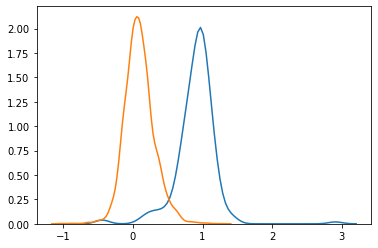

In [10]:
sns.distplot(pl_probs, hist=False)
sns.distplot(org_probs, hist=False)
plt.show()

In [11]:
print(pp.clf.cv_results_)

{'mean_fit_time': array([1.24052172, 0.12707367, 0.06644826, 0.0200933 , 0.02096119,
       0.02056422, 0.0203321 ]), 'std_fit_time': array([0.02934236, 0.00727806, 0.00254741, 0.00035043, 0.00152236,
       0.00067135, 0.00063744]), 'mean_score_time': array([0.00112476, 0.00135159, 0.00086999, 0.00082855, 0.00091333,
       0.00088134, 0.00084543]), 'std_score_time': array([2.54706932e-05, 7.61984093e-04, 2.63773283e-06, 3.63159004e-05,
       1.64412138e-04, 1.32571158e-04, 7.11213451e-05]), 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 5, 10],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 5}, {'alpha': 10}], 'split0_test_score': array([-0.04711254, -0.06361728, -0.12134227, -0.25001478, -0.25001478,
       -0.25001478, -0.25001478]), 'split1_test_score': array([-0.04594911, -0.0597761 , -0.1

In [12]:
print(pp.clf.scorer_)

make_scorer(mean_squared_error, greater_is_better=False)


In [13]:
alpha_l = [1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10]
std = [0.00404521, 0.00424329, 0.00506674, 0.0001205, 0.0001205, 0.0001205, 0.0001205]
mean = [-0.04646859, -0.06017553, -0.12478774, -0.24996776, -0.24996776, -0.2499102 , -0.2499102] 

(-1, 10)

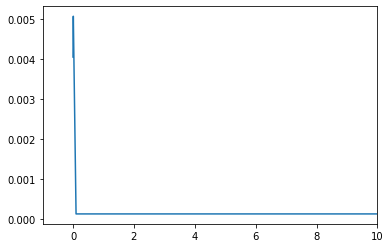

In [14]:
plt.plot(alpha_l, std)
plt.xlim(-1, 10)

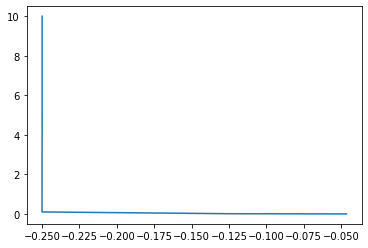

In [15]:
plt.plot(mean, alpha_l)